# BASIC CONCEPTS ON DESCRIPTIVE STATISTICS AND STATISTICAL INFERENCE 
## Descriptive Analysis
Is a branch of statistics that summarises the characteristics of a data set. They are mainly
* measures of central tendency
* measures of variability(spread/dispersion)
* Frequency distribution

### Measures of central tendency
These refer to numbers that represent the middle of the data. The include **mean(arithmetic), median** and **mode**.

$$\text{mean}, \bar{x} =\sum_{i=1}^n \dfrac{x_i}{n}$$

* **mean**: The sum divided by the number of elements
* **median** the middle value when the values are arranged logically based on the magnitude
* **mode** the most common item
  
Let us consider the housing data. The data contains the census report of the households grouped in blocks in California. 

Column details:
* **longitute**: A measure of how far west a house is, a higher value is farther west
* **latitide**: A measure of how far north a house is; a higher vale is farther north
* **housing_median_age**: The median age of a house within a block; a lower number is a new building
* **total_rooms**: total number of rooms within a block
* **total_bedrooms**: total number of bedrooms within a block
* **population**: total number of people residing within a block
* **households**: Total number of households, a group of people residing within a home unit, for a block
* **median_income**: median income for households within a block of houses(measured in 10,000USD)
* **median_house_value**: median house value for households within a block(in USD)
* **ocean_Proximity**: Location of the house of the ocean or sea
t ocean/sea


In [4]:
#Load the libraries
#ensure that the graphics are displayed in the notebook, we use the magic function below
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 

In [5]:
housing_data=pd.read_csv('housing.csv') #creating a pandas dataframe
housing_data.head(2) ##see the first 2 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [6]:
housing_data.tail(1) ##see the last 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
housing_data.shape #dimension rows, columns

(20640, 10)

In [8]:
housing_data.shape[0]

20640

In [9]:
housing_data.info() #view the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
mean_med_inc=housing_data.describe()['median_income'].iloc[1]

In [16]:
print(round(mean_med_inc,2))

3.87


In [21]:
round(housing_data.describe()['median_house_value'].iloc[2],-3)

np.float64(115000.0)

In [15]:
no_rows=housing_data.describe()['latitude'].iloc[0]

In [16]:
no_rows

20640.0

In [9]:
#It is evidet that total_bedrooms columns has missing values(None)

#### slicing

In [31]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [27]:
housing_data['total_rooms']
housing_data[['total_rooms','ocean_proximity']] ## .rstrip() removes space from the right  .lstrip(),   .strip()

,total_rooms,ocean_proximity
0,880.0,NEAR BAY
1,7099.0,NEAR BAY
2,1467.0,NEAR BAY
3,1274.0,NEAR BAY
4,1627.0,NEAR BAY
...,...,...
20635,1665.0,INLAND
20636,697.0,INLAND
20637,2254.0,INLAND
20638,1860.0,INLAND


In [18]:
#get data for one row
housing_data['total_rooms'].shape #this is a Pandas series, 1 dimensional, 1 dimension

(20640,)

In [12]:
housing_data.total_rooms.head(2) # we can also get the above series using the dot notation, 1 dimension

0     880.0
1    7099.0
Name: total_rooms, dtype: float64

In [19]:
housing_data[['total_rooms']].shape  # this makes it possible to be two dimensional 

(20640, 1)

In [32]:
housing_data.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [21]:
##select many columns
housing_data[['total_rooms','total_bedrooms','population']].head(2)

,total_rooms,total_bedrooms,population
0,880.0,129.0,322.0
1,7099.0,1106.0,2401.0


In [36]:
housing_data.iloc[:,:-2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [22]:
housing_data.iloc[20634, -2:]

median_house_value    116800.0
ocean_proximity         INLAND
Name: 20634, dtype: object

In [37]:
housing_data.tail(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [40]:
housing_data.iloc[20639,:] #specific row with all columns


longitude             -121.24
latitude                39.37
housing_median_age       16.0
total_rooms            2785.0
total_bedrooms          616.0
population             1387.0
households              530.0
median_income          2.3886
median_house_value    89400.0
ocean_proximity        INLAND
Name: 20639, dtype: object

In [29]:
housing_data.iloc[20634,-3:]

median_income           3.7125
median_house_value    116800.0
ocean_proximity         INLAND
Name: 20634, dtype: object

In [17]:
# using .loc and iloc. iloc selects rows and columns by using integer positions while loc is by labels
housing_data.iloc[0:3,0:4] # seleacts all rows elements for the column 0,1,2,and 3

,longitude,latitude,housing_median_age,total_rooms
0,-122.23,37.88,41.0,880.0
1,-122.22,37.86,21.0,7099.0
2,-122.24,37.85,52.0,1467.0


In [30]:
housing_data.loc[1:2] #selects the row 2 to 3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [31]:
housing_data.loc[0:3] #selects the first 4 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [33]:
housing_data.iloc[:,np.r_[0:3,5]]

,longitude,latitude,housing_median_age,population
0,-122.23,37.88,41.0,322.0
1,-122.22,37.86,21.0,2401.0
2,-122.24,37.85,52.0,496.0
3,-122.25,37.85,52.0,558.0
4,-122.25,37.85,52.0,565.0
...,...,...,...,...
20635,-121.09,39.48,25.0,845.0
20636,-121.21,39.49,18.0,356.0
20637,-121.22,39.43,17.0,1007.0
20638,-121.32,39.43,18.0,741.0


In [32]:
housing_data.iloc[:,np.r_[0:3,5]].head(2) #selects columns that are not following on another

,longitude,latitude,housing_median_age,population
0,-122.23,37.88,41.0,322.0
1,-122.22,37.86,21.0,2401.0


#### Question 1
* Find the mean, median and mode population of the blocks
* Find the most common total number of rooms in the block

In [41]:
ab=35762.283932
print(ab)
print("2decimal places:", round(ab,2)) #2decimal places
print("tens:",round(ab,-1)) #tens
print("hundreds:",round(ab,-2)) #hundreds

35762.283932
2decimal places: 35762.28
tens: 35760.0
hundreds: 35800.0


In [43]:
housing_data['population'].mean()

np.float64(1425.4767441860465)

In [44]:
round(housing_data['population'].mean(),2)

np.float64(1425.48)

In [45]:
round(housing_data['population'].median(),2)

np.float64(1166.0)

In [46]:
round(housing_data['population'].mode(),2)

0    891.0
Name: population, dtype: float64

In [47]:
housing_data['total_rooms'].var()

np.float64(4759445.105938661)

In [48]:
print("mean= {}, median= {} ".format(round(housing_data['population'].mean(),2),housing_data['population'].median()))

mean= 1425.48, median= 1166.0 


In [49]:
mean_pop=round(housing_data['population'].mean(),2)
median_pop=housing_data['population'].median()
print("mean= {}, median= {} ".format(mean_pop,median_pop))

mean= 1425.48, median= 1166.0 


In [50]:
housing_data['total_rooms'].mode()


0    1527.0
Name: total_rooms, dtype: float64

In [6]:
#use collections module to get the mode
from collections import Counter
dict_counter=Counter(housing_data['total_rooms'])
common_el=dict_counter.most_common(8)
common_el

[(1527.0, 18),
 (1613.0, 17),
 (1582.0, 17),
 (2127.0, 16),
 (1471.0, 15),
 (2053.0, 15),
 (1717.0, 15),
 (1607.0, 15)]

In [59]:
dict_counter.most_common(1)

[(1527.0, 18)]

In [61]:
dict_counter.most_common(1)[0][1]

18

In [62]:
dict_counter.most_common(1)[0][0]

1527.0

In [63]:
c_number=common_el[0]
c_freq=common_el[1]
print("common_el_number ={} and common_el_freq={}".format(c_number,c_freq))

common_el_number =(1527.0, 18) and common_el_freq=(1613.0, 17)


In [64]:
#my work
from collections import Counter
dict_counter=Counter(housing_data['population'])
dict_counter.most_common(2)

[(891.0, 25), (1227.0, 24)]

In [65]:
dict_counter.most_common(4)

[(891.0, 25), (1227.0, 24), (761.0, 24), (850.0, 24)]

In [7]:
a=np.array([13,25,25,24,13,12,23,12,17,25,34,23,23,22,23])
b=Counter(a)
print(b)

Counter({np.int64(23): 4, np.int64(25): 3, np.int64(13): 2, np.int64(12): 2, np.int64(24): 1, np.int64(17): 1, np.int64(34): 1, np.int64(22): 1})


In [63]:
tup=b.items()
tup

dict_items([(13, 2), (25, 3), (24, 1), (12, 2), (23, 4), (17, 1), (34, 1), (22, 1)])

In [64]:
b.get(23)

4

In [8]:
a

array([13, 25, 25, 24, 13, 12, 23, 12, 17, 25, 34, 23, 23, 22, 23])

In [14]:
dict2={}
for i in a:
    dict2[i]=dict2.get(i,0)+1
dict2



{np.int64(13): 2,
 np.int64(25): 3,
 np.int64(24): 1,
 np.int64(12): 2,
 np.int64(23): 4,
 np.int64(17): 1,
 np.int64(34): 1,
 np.int64(22): 1}

In [15]:
print(dict2[25]) #gives me a value
print(dict2.keys())

3
dict_keys([np.int64(13), np.int64(25), np.int64(24), np.int64(12), np.int64(23), np.int64(17), np.int64(34), np.int64(22)])


In [16]:
max(dict2.values())

4

In [17]:
# use the dictionary to get the mode. Create the dictionary and get the most common
dict1={}
for number in housing_data['total_rooms']:
    dict1[number]=dict1.get(number,0)+1
high_frequency=max(dict1.values())
high_frequency

18

In [19]:
#Use for loop extract the key with the highest value given the dictionary value
for k,v in dict1.items():
    if dict1[k]== high_frequency:
        print(k)

1527.0


In [79]:
list(range(1,10+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
[a**2 for a in range(1,10+1)] #a list comprehension

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [21]:
#Use list comprehension to print the key(total rooms) with the highest frequency
most_frequent=[k for k,v in dict1.items() if dict1[k]==high_frequency] 
print(high_frequency)
print(most_frequent[0])

18
1527.0


## list comprehension

In [22]:
b1=[4,5,6,7,6,5,6,3,9,8,2]

In [23]:
for number in b1:
    if number % 2==0:
        print(number)

4
6
6
6
8
2


In [24]:
def even_in_list(list1):
    even_nums=[]
    for number in list1:
        if number % 2 == 0:
            even_nums.append(number)
    return even_nums           
    

In [25]:
even_in_list(b1)

[4, 6, 6, 6, 8, 2]

In [26]:
even_list=[even_nums for even_nums in b1 if even_nums % 2 == 0] #list compressions
even_list

[4, 6, 6, 6, 8, 2]

In [27]:
odd_list=[even_nums for even_nums in b1 if even_nums % 2 == 1] #list compressions
odd_list

[5, 7, 5, 3, 9]

### Measures of dispersion

* **Range**: How far is a spread of values between the largest and the smallest one; It is the difference between the highest value and the lowest value in the data
* **quartiles**: values that divide logically arranged data into four parts with the same number of items. The data must be arranged in ascending order
    * *1st quartile*, the value between the first and the second quarters
    * *2nd quartile* is the value between the second and third quarters. This is the median
    * *3rd quartile*, the value between the third and the fourth quarters
* **percentile**: values that divide logically arranged data into 100 parts with the same number of items. The data must be arranged in ascending order
* **Interquartile range**: the difference between the 1st and third quartile
* **Standard deviation**: A measure of distribution of data around the mean.
* **Variance**: Is a measure of how data points vary from the mean. This is closely related to the standard deviation. Both standard deviation and variance almost represent a similar concept but are used differently in application.
* **Kurtosis,*k***: Is a measure of how tailed(peaked) the distribution is with respect to the normal distribution. For a normal distribution, *k=3*. When *k>3* the distribution has thin bell a high peak(**Leptokurtic**) and when *k<3* the distribution has a thick bell with a low peak  peaked(**platykurtic**)  
* **Skewness,s**: The measure of symmetrical behavior of a distribution. For a normal distribution, *s=0*. When the distribution is skewed to the left, **negatively skewed** , (the long tail is to the left), *$s < 0$* and when the distribution is skewed to the right **positively skewed** (the long tail is to the right), *$s > 0$*

* 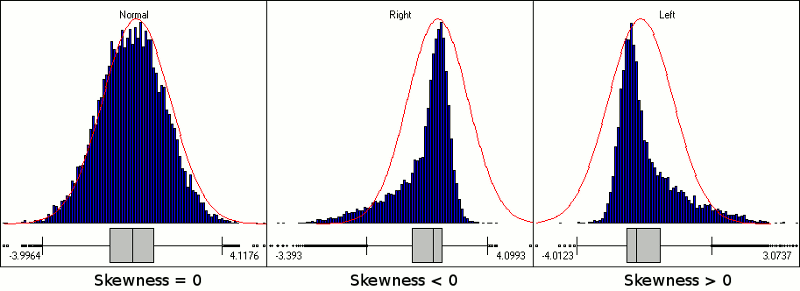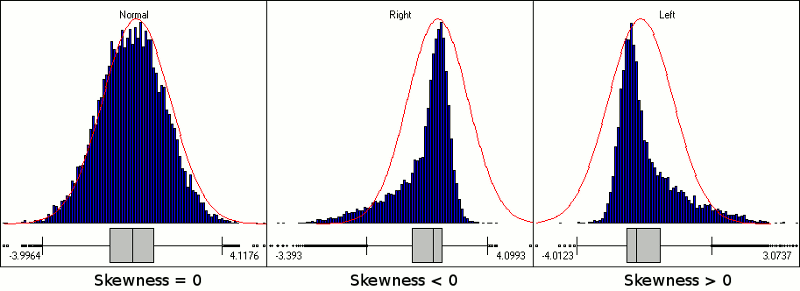

#### Question 2
* Find the range of the number of rooms among the blocks
* Find the quartiles and the inter-quartile range of the number of rooms among the blocks
* Find the lowest value of the median income of the 5% top highest earners in the blocks
* Find the variance and standard deviation of the median income among the blocks
* Find the kurtosis and skewness of the distribution of the median income

In [42]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
housing_data['total_rooms'].min()

np.float64(2.0)

In [29]:
#range
housing_data['total_rooms'].max() -(housing_data['total_rooms'].min())

np.float64(39318.0)

In [45]:
np.percentile(housing_data['total_rooms'],75) #third quartile 

3148.0

In [41]:
np.percentile(housing_data['total_rooms'],[10,20])

array([ 941., 1298.])

In [37]:
Q1,Q2,Q3=np.percentile(housing_data['total_rooms'],[25,50,95])

In [36]:
print('Q1={}, Median={}, and Q3={}'.format(Q1,Q2,Q3))

Q1=1447.75, Median=2127.0, and Q3=11212.11000000003


In [43]:
#quartiles
q1,q2,q3=np.percentile(housing_data['total_rooms'],[25,50,75]) 
#this is tuple unpaking, we create tuple on the right then npack it(asign it values on the right)
print("q1={}, q2={}, q3={}".format(q1,q2,q3)) 

q1=1447.75, q2=2127.0, q3=3148.0


In [44]:
#interquatile range
interq_s=q3-q1
interq_s

np.float64(1700.25)

In [48]:
#lowest of top 5% is 95% percentile. We order the column ascending then get the 95% percentile
m_income=housing_data['median_income'].sort_values(ascending=False) #sort values ascending, if descending, we use .sort_values(ascending=False)
#Arrange data in ascending order
#m_income
m_income[:9]

8851     15.0001
8850     15.0001
8849     15.0001
8848     15.0001
8852     15.0001
15241    15.0001
8878     15.0001
8805     15.0001
8847     15.0001
Name: median_income, dtype: float64

In [51]:
m_income [m_income > np.percentile(m_income,75)].min()

np.float64(4.7437)

In [52]:
m_income[m_income > np.percentile(m_income,99)]

8851     15.0001
8850     15.0001
8849     15.0001
8848     15.0001
8852     15.0001
          ...   
17171    10.6514
10682    10.6349
9354     10.6272
15152    10.6186
10318    10.5981
Name: median_income, Length: 207, dtype: float64

In [55]:
#using assert method to show that the 96% percentile is less than 95%. This is to ensure that you are on the track
assert np.percentile(m_income,96) > np.percentile(m_income,95) 

In [56]:
#variance and standard deviation
round(housing_data.median_income.std(),4) #round to 4 decimal places

np.float64(1.8998)

In [57]:
round(housing_data['median_income'].std(),4)

np.float64(1.8998)

In [58]:
#variance
round(housing_data['median_income'].var(),4)

np.float64(3.6093)

In [59]:
#kurtosis
round(housing_data['median_income'].kurtosis(),3)

np.float64(4.953)

In [60]:
round(housing_data['median_income'].skew(),3)

np.float64(1.647)

In [61]:
a1,a2,a3=np.percentile(housing_data['median_income'],[25,50,75])
IQR_a=a3-a1

## outliers
They are points that significantly differ from others. 
In practical application, they are taken to be
* less than 5% and more than 95% in a normal distribution
* less than Q1-1.5IQR or more than Q3+1.5IQR
* significantly outside the trend of the general distribution of the data 

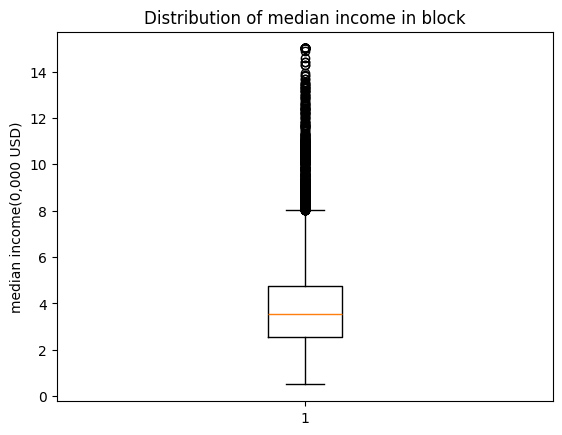

In [63]:
#By using the box plot, we can identify the outliers
plt.boxplot(housing_data['median_income'])
plt.ylabel('median income(0,000 USD)')
plt.title('Distribution of median income in block')
plt.show();
# see notice many outliers above the upper whisker

In [64]:
qq1,qq2,qq3=np.percentile(housing_data['median_income'],[25,50,75])
lower_whisker=qq1-(1.5*(qq3-qq1))
upper_whisker=qq3+(1.5*(qq3-qq1))

In [65]:
print(lower_whisker,upper_whisker)

-0.7063750000000004 8.013024999999999


In [66]:
D=np.array([3,5,6,7,2,3,6,3,9,6,4])

In [67]:
D>4

array([False,  True,  True,  True, False, False,  True, False,  True,
        True, False])

In [68]:
D[D>4]

array([5, 6, 7, 6, 9, 6])

In [69]:
housing_data['median_income']>upper_whisker

0         True
1         True
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_income, Length: 20640, dtype: bool

In [73]:
housing_data['median_income'][housing_data['median_income']>upper_whisker].size

681

In [74]:
#compute the outlier
outl_low=housing_data['median_income'][housing_data['median_income']< lower_whisker]
outl_hig=housing_data['median_income'][housing_data['median_income']> upper_whisker]

In [75]:
housing_data['median_income'][housing_data['median_income']>upper_whisker]

0         8.3252
1         8.3014
131      11.6017
134       8.2049
135       8.4010
          ...   
20426    10.0472
20427     8.6499
20428     8.7288
20436    12.5420
20503     8.2787
Name: median_income, Length: 681, dtype: float64

In [76]:
lower_whisker

np.float64(-0.7063750000000004)

In [77]:
outl_low.size #none of then

0

In [78]:
outl_hig.size #681 outliers

681

### Frequency distributions
We can create tables for frequency distributions the represent them on graphs such as bar graphs, histograms,pie charts among others

In [79]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [80]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [81]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [82]:
housing_data['ocean_proximity'].value_counts().values

array([9136, 6551, 2658, 2290,    5])

In [88]:
np.array(list(housing_data['ocean_proximity'].value_counts().keys()))

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype='<U10')

### Common Visualizations

Create a frequency distribution table showing the ocean proximity for various block

In [89]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [90]:
block_locs=housing_data['ocean_proximity'].unique().tolist()
block_locs

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

In [ ]:
plt

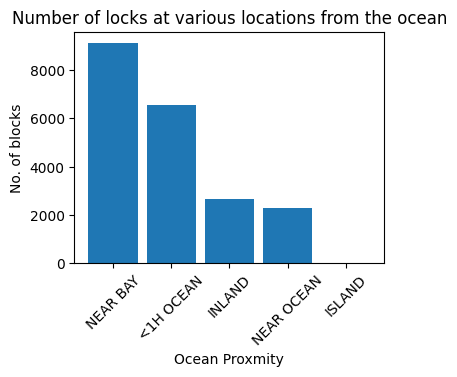

In [122]:
#create a bar graph for this data
freq_blocks=housing_data['ocean_proximity'].value_counts()
#fig,ax=plt.subplots(figsize=(6,4))
plt.figure(figsize=(4,3))
plt.bar(block_locs,freq_blocks,width=0.85)
plt.title('Number of locks at various locations from the ocean')
plt.ylabel('No. of blocks')
plt.xlabel('Ocean Proxmity')
plt.xticks(rotation=45)
plt.show();


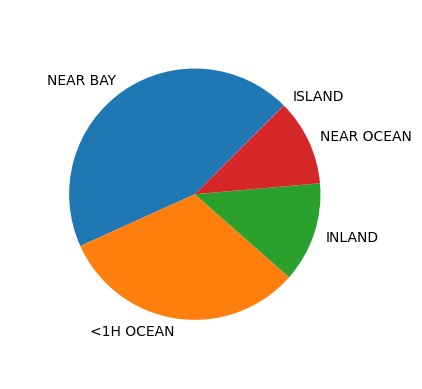

In [108]:
#pie chart
plt.pie(housing_data['ocean_proximity'].value_counts(),labels=block_locs,startangle=45,radius=0.85);

In [109]:
housing_data['median_income'].shape

(20640,)

In [110]:
housing_data[['median_income']].shape

(20640, 1)

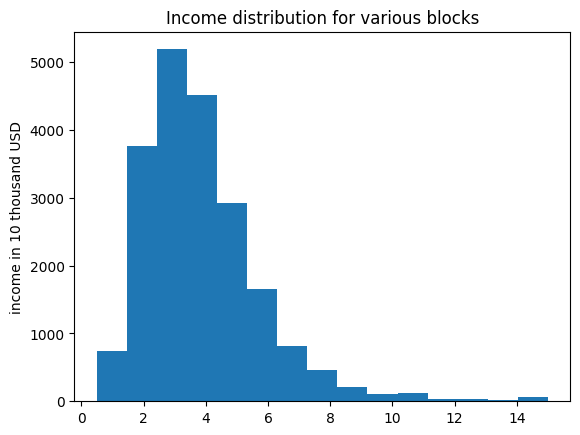

In [114]:
#create a histogram for the income distributions
plt.hist(housing_data['median_income'], bins=15)
plt.ylabel('income in 10 thousand USD')
plt.title('Income distribution for various blocks')
plt.show();


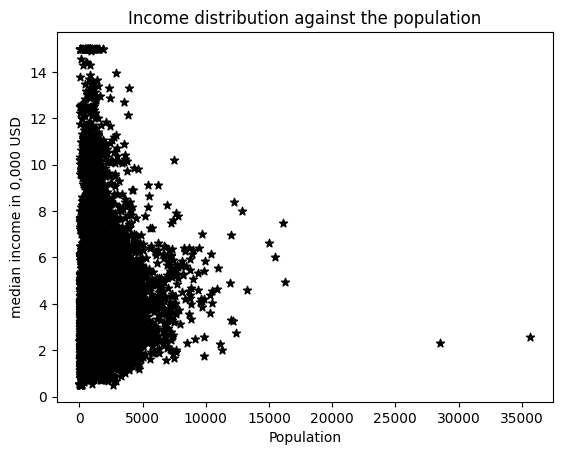

In [121]:
#create a scatter plot for income against the population
plt.scatter(housing_data['population'],housing_data['median_income'],marker='*',color='black');
plt.xlabel('Population')
plt.ylabel('median income in 0,000 USD')
plt.title('Income distribution against the population')
plt.show();

# Statistical Inference
In this case, we focus on test of Hypothesis and confidence interval

Inference implies generalizing the results from a sample to the whole population under study. We make an assumption that the sample was randomly generated and is unbiased.

Statistical inference makes use of the normal distribution which is a doomed-shaped symmetrical distribution whose mean and median are equal. The probability density distribution (**pdf**) for normal distribution is
$$f(x,\mu,\sigma)=\dfrac{1}{\sigma \sqrt{2\pi}}e^{-\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^2}$$
where $x$ is a variable, $\mu$ is the mean and $\sigma$ is the standard deviation of the distribution.
To apply normal distribution easily, we transform the pdf into a distribution with a $\mu=0$ and $\sigma=1$. This distribution is called a standard normal ditribution whose pdf is 
$$f(z)=\dfrac{1}{\sqrt{2\pi}}e^{-\dfrac{1}{2}z^2}$$
and transformation is 
$$z=\dfrac{x-\mu}{\sigma}$$
called the $z$-score.

Given the value of $z$, we can find the cumulative probability distribution that $P(z \leq z_a)$ where $z_a$ is the $z$-score.


### Question 3

A scientist surveyed the scores of university students in an aptitude test. The average score was 54\% with a standard deviation of 6.3. If a university student is selected at random to attempt the test, what is the probability that a student will score
* less than 55%
* more than 63%
* Between 59% and 69%

assuming that the distribution of the score was normal.

We use the scipy's stats module

Let $X$ be a random variable representing the score of a standard and $Z$ be the score

We find $P(X \leq 50)$

Z-value is given by

$$z=\dfrac{x-\mu}{\sigma}$$

In [124]:
x_value=55
sample_mean=54
sample_std=6.3


In [125]:
#P(X<=50)
z_50 =(x_value-sample_mean)/sample_std
p_less_50=stats.norm.cdf(z_50)
round(p_less_50,4)

np.float64(0.5631)

In [126]:
from scipy import stats
def p_value_n(x_val,mean,std):
    """
    The function outputs the p-value of a norm cdf given the value, average and stad dev
    Arguments=x_value, mean, std_dev
    Output=p-value(size of area under the graph to the left of x)
    """
    z_value=(x_val-mean)/std
    p_val=round(stats.norm.cdf(z_value),4)
    return p_val    

In [127]:
p_value_n(55,54,6.3)

np.float64(0.5631)

In [128]:
#P(X>=63)
z_63 =(63-54)/6.3
p_more_63=1-stats.norm.cdf(z_63)
round(p_more_63,4)

np.float64(0.0766)

In [15]:
#more than 63%
1-p_value_n(63,54,6.3)

0.0766

In [129]:
#P(59<X<69)
z_69 =(69-54)/6.3
z_59 =(59-54)/6.3
p_btn_69_59=stats.norm.cdf(z_69) - stats.norm.cdf(z_59)
round(p_btn_69_59,4)

np.float64(0.2051)

In [130]:
round((p_value_n(69,54,6.3)-p_value_n(59,54,6.3)),4)

np.float64(0.2051)

## Confidence interval
The confidence interval estimates the population parameter given a sample statistic. The confidence interval is a range within which we are sure that the population parameter will lie to a certain probability. The 95\% confidence interval for a population mean $\mu$ is
$$\left(\bar{x} - Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}, \bar{x} + Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}\right)$$
or $$\bar{x} \pm Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}$$

The number $Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}$ is called the marginal error

Note/: The sampling distribution of the mean whose population standard deviation is $\sigma$, the standard error(standard deviation of the sample) is $\sqrt{\dfrac{\sigma^2}{n}}=\dfrac{\sigma}{\sqrt{n}}$ where $n$ is the sample size. By central limit theorem, for larger values of $n$, the standard deviation approached $\sigma$ irrespective of the underlaying distribution. 

In the above question, what would be 95\% confidence interval for the mean of 54\% for a sample size of 100.

The level of significance is $1-0.95 = 0.05=\alpha$. When the sample size is more than 30, the distribution is approximately normal, hence we use the Z-score. 

**The confidence interval for the proportion**

If $\hat{p}$ is the proprotion of the required trait, then $\hat{q}=1-\hat{p}$ is the other trait.

If $n$(e.g number of Yes) have the required trait out of $N$ possible traits(e.g no. of Yes and NO), then $\hat{p}=\dfrac{n}{N}.$ The standard deviation if $\hat{p}$ is $s=\dfrac{\hat{p}\hat{q}}{n}$.

$$\left(\hat{p} - Z_{\alpha/2} \sqrt{\dfrac{\hat{p}\hat{q}}{n}}, \hat{p} + Z_{\alpha/2} \sqrt{\dfrac{\hat{p}\hat{q}}{n}}\right)$$
or $$\hat{p} \pm Z_{\alpha/2} \sqrt{\dfrac{\hat{p}\hat{q}}{n}}$$


In [19]:
sample_size=100
std_dev=6.3
mean_s=54
z_alpha_half=stats.norm.ppf(0.975)
z_alpha_half

1.959963984540054

In [20]:
error_margin=z_alpha_half*std_dev/np.sqrt(sample_size)
print("Confidence interval:({},{})".format(round(mean_s-error_margin,2),round(mean_s+error_margin,2)))

Confidence interval:(52.77,55.23)


## Hypothesis test
We can also test if a value satisfies a certain condition. For instance, we may test if the population mean is equal to  51, more than 51 or less than 51 with a specific accuracy level. This statement provides 3 different cases of hypothesis test. 

First, we formulate the hypothesis statements. We have two, the **null hypothesis** and the **alternative hypothesis**. The **null** hypothesis,$H_0$, is a statement that represents the claim, current situation or existing information that has to be disproved or not while the **alternative** hypothesis,$H_1$, represents a new situation or information that will be determined given sufficient evidence.
If a simple random sample from the population is done, we would like to determine if;
1. mean is equal to  51
   
   $H_0: \mu=51$
   
   $H_1: \mu \neq 51$   
   This is a two-tailedd test.
   
   $H_0: \mu=51$
   
   $H_1: \mu < 51$   
   This is a one left tail test.

   $H_0: \mu=51$
   
   $H_1: \mu > 51$
   This is a one right tail test.

   We reject the null hypothesis if positive of p_value < alpha
2. mean is less than  51
   
   $H_0: \mu < 51$
   
   $H_1: \mu \geq 51$
   This is a one-right-tail test.

   We reject the null hypothesis if positive of p_value < alpha
   
3. mean is more than  51
   
   $H_0: \mu > 51$
   
   $H_1: \mu \leq 51$   This is a one-left-tail test.
   
   We reject the null hypothesis if positive of p_value < alpha

In both cases, for $n>0$, the test statistics is
$$z=\dfrac{\mu_0 -\mu}{\sigma/\sqrt{n}}$$
Where $n$ is the sample size and $\mu_0$ is value being compared to in the hypothesis statement. In our case, we will be using Z-statistics(score) because we will be working with sample sizes more than 30. In a situation where the sample size is less than 30, we use the t-statistic

**Example: Using a significance level of $\alpha =0.01(99%$), test whether the the population mean is less than 51%, n=100**

**Example: Using a significance level of $\alpha =0.01(99%$), test whether the the population mean is equal to 51%, n=100**

In [25]:
#Using a significance level of \alpha =0.01(99%), test whether the the population mean is equal to 51%, n=100
alpha=0.01
test_mean=51
mean_s=54
std_dev=6.3
sample_size=100
test_statistic= (test_mean-mean_s)/(std_dev/np.sqrt(sample_size))
test_statistic
p_value=stats.norm.cdf(test_statistic)
p_value

9.58870944497607e-07

In [99]:
p_value < 0.05 # if mu_0 != 51

True

In [92]:
p_value < 0.01  #if mu_0 <51%

True

In [26]:
#Using a significance level of \alpha =0.01(99%), test whether the the population mean is less than 51%, n=100
alpha=0.01
test_mean=51
test_statistic=(test_mean-mean_s)/(std_dev/np.sqrt(sample_size))
p_value=stats.norm.cdf(test_statistic)

if p_value < alpha:
    print('reject the null hypothesis in faviour of the alternative hypothesis')
else:
    print('There is no enough evidence to reject the null hypothesis, hence, the null hypothesis is true')

print(p_value)

reject the null hypothesis in faviour of the alternative hypothesis
9.58870944497607e-07


In [27]:
def test_less_than(alpha,test_mean,mean_s,std,sample_size):
    """

    """
    test_statistic=(test_mean-mean_s)/(std/np.sqrt(sample_size))
    p_value=stats.norm.cdf(test_statistic)
    if p_value < alpha:
        return 'reject the null hypothesis in favour of the alternative hypothesis'
    else:
        return 'There is no enough evidence to reject the null hypothesis, hence, the null hypothesis is true'

In [28]:
test_less_than(0.01,51,54,6.3,100)

'reject the null hypothesis in favour of the alternative hypothesis'

In [29]:
housing_data['total_rooms'].mean()

2635.7630813953488